## Warmup

#### Creating a pandas series where indexes are first 10 english letters and values are first 10 primes

In [24]:
import pandas as pd

def prime():
    num = 1
    
    while True:
        if not any([ num % i == 0 for i in range(2, int(num**(1/2)) + 1)]):
            yield num
        num += 1

prime_func = prime()

idx = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
numbers = [ next(prime_func) for _ in range(10)]

s = pd.Series(numbers, index=idx)

#### Some examples with pandas Series

In [64]:
s[1:3]
s[-2]
s['a']
s['c':'h']
s[ s > 10 ]
s**2
s + 10

s.name = 'example'

print(s)
new_s = s.map(lambda s: len(str(s)))
t = pd.Series({1: '1 digit', 2: '2 digits'})
new_s.map(t)

a     1
b     2
c     3
d     5
e     7
f    11
g    13
h    17
i    19
j    23
Name: example, dtype: int64


a     1 digit
b     1 digit
c     1 digit
d     1 digit
e     1 digit
f    2 digits
g    2 digits
h    2 digits
i    2 digits
j    2 digits
Name: example, dtype: object

#### Reconstruct given table

In [36]:
simple_table

a      1
b      4
c      9
d     25
e     49
f    121
g    169
h    289
i    361
j    529
dtype: int64

#### Some examples with pandas Series

,column1,column2,column3
0,1.025419,-2.976727,0.131800
1,1.101451,-0.490499,0.707455
2,-0.741050,-1.428891,0.963309
3,1.609075,-0.383084,-0.298464


,A,B,C,D
0,plant,apple,-0.439630,0.498947
1,animal,goat,-1.092077,0.683086
2,plant,kiwi,0.089303,0.929780
3,plant,grape,0.545038,0.819025


0         1
major handedness                    
math  left       -0.374969 -0.154265
      right      -0.722045  0.054479
econ  left       -0.077270  1.445873
      right      -2.899359 -0.038448
stats left        1.344557  0.302925
      right      -0.060205  0.392950

,date,variable,value
0,2020,A,12
1,2020,B,14
2,2021,A,3
3,2021,B,8
4,2022,B,-4


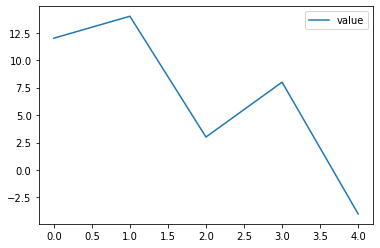

In [217]:
import numpy as np

df = pd.DataFrame(np.random.randn(4, 3), columns=['column1', 'column2', 'column3'])
display(df)

# add new column
df['index'] = [0,1, 2, 3]

# delete column
del df['index']

# select specific columns
df[['column1', 'column2']]

# select specific row by label
#df.loc['Obama']

# select specific row by index
df.iloc[1]

# math
10*df + 10

# any all
(df > 0).any()
(df > 0).all()

# get values
df.values

# transpose
df.T**2

# dot
df.T.dot(df)

# NaN
df['some'] = np.nan
df['some2'] = [np.nan, 1, 2, 3]
df.dropna(axis=1, how='any')
df.dropna(axis=1, how='all')

# mean
df.mean(0)
df.mean(1)

# info
df.describe()

# apply function
df.apply(np.mean)
df.apply(np.exp, axis=1)


# or custom function
def quadratic(x, a, b, c=1):
    #print(x, a, b, c)
    return a*x**2 + b*x + c

df.apply(quadratic, args=(1, 2), c=2, axis=1)

# apply not on column/row but element-wise
df = pd.DataFrame({'A': ['cat', 'dog', 'mouse'],
                   'B': ['goat', 'bird', 'pig']})
df.applymap(lambda s: s.upper())

# count number of unique elements
len(df.A.value_counts())


# tale function
f = lambda x: x**2
g = lambda x: x + 10
h = lambda x: x / 3

df = pd.DataFrame(np.random.randn(5, 3),
                  columns=['A', 'B', 'C'])
h(g(f(df)))

# or
df.pipe(f).pipe(g).pipe(h)

# percent age
df.pct_change()

# ranking data
df.rank()
df.rank(1)

# aggregating
df.agg([np.median, np.mean, np.std])
df.agg(['mean', 'max', 'min'])

# iterate over columns
for i in df:
    #print(i)
    pass
    
for i in df.iteritems():
    #print(i)
    pass

# iterate over rows
# iterrows is very slow and it is better to use map or apply
for i in df.iterrows():
    #print(i)
    pass

    
# groupby
df = pd.DataFrame({'A': ['plant', 'animal', 'plant', 'plant'],
                   'B': ['apple', 'goat', 'kiwi', 'grape'],
                   'C': np.random.randn(4),
                   'D': np.random.rand(4)})

display(df)

df.groupby('A').groups

# compute mean
df.groupby('A').mean()


# building multiindex dataframe
arrs = [['math', 'math', 'econ', 'econ', 'stats', 'stats'],
        ['left', 'right', 'left', 'right', 'left', 'right']]
index = pd.MultiIndex.from_arrays(arrs, names=['major', 'handedness'])

df = pd.DataFrame(np.random.randn(6, 2), index=index)
display(df)

# transform
df.groupby('major').transform(lambda x: x/2)
#filter
#df.groupby('major').filter(lambda x: x.sum() > 0)


# pivot
df = pd.DataFrame({'date': ['2020', '2020', '2021', '2021', '2022'],
                   'variable': ['A', 'B', 'A', 'B', 'B'],
                   'value': [12, 14, 3, 8, -4]})
display(df)
df.pivot(index='date', columns='variable', values='value')

# stacking
df.stack()

# sum
df.cumsum()
_ = df.plot()

#### Multi dataframe

In [198]:
def score2_gen():
    '''
        Function generates sequence of data for score2 column
    '''
    num = 2
    yield 2
    
    while True:
        num += 2
        yield num
        yield num

arrs = [['goat', 'goat', 'goat', 'goat', 
         'bird', 'bird', 'bird', 'bird',
         'llama', 'llama', 'llama', 'llama'],
        ['A', 'A', 'a', 'a', 
         'A', 'A', 'a', 'a', 
         'A', 'A', 'a', 'a'],
        ['A', 'a', 'A', 'a', 
         'A', 'a', 'A', 'a', 
         'A', 'a', 'A', 'a']]
index = pd.MultiIndex.from_arrays(arrs, names=['animal', 'parent1', 'parent2'])

df = pd.DataFrame(np.nan, index=index, columns=['score1', 'score2'])
df['score1'] = range(1, 13)

func = score2_gen()
df['score2'] = [ next(func) for _ in range(1, 13) ]

display(df)

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

## Working with pandas

In [215]:
iris = pd.read_csv('./help/iris.csv')

# number of unique plants
len(iris.Species.value_counts())

3

In [222]:
iris.loc[34] = [4.9,3.1,1.5,0.2,"setosa"]
iris.loc[35] = [4.9,3.6,1.4,0.1,"setosa"]

In [224]:
iris['Petal.Ratio'] = iris['Petal.Length'] / iris['Petal.Width']
iris['Sepal.Ratio'] = iris['Sepal.Length'] / iris['Sepal.Width']

In [225]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


### Determine the mean, median, minimum, maximum and standard deviation of the petal and sepal ratio for each species and save it as a table

In [247]:
species_agg = iris.groupby('Species')[['Petal.Ratio', 'Sepal.Ratio']].agg([np.mean, np.median, 'min', 'max', np.std])

In [248]:
species_agg

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        7.088000  7.000000  2.666667  15.0  3.071624    1.470551   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.119065  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Plot

In [249]:
import matplotlib.pyplot as plt

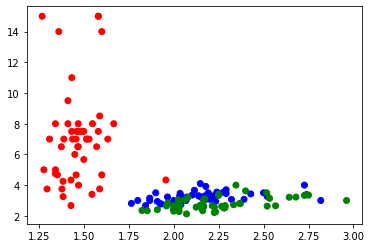

In [260]:
iris_colored = iris
iris_colored['color'] = iris_colored.Species.map({'setosa': 'r', 'versicolor': 'b', 'virginica': 'g'})

_ = plt.scatter(iris_colored['Sepal.Ratio'], iris_colored['Petal.Ratio'], c=iris_colored.color)
plt.savefig("iris_scatter.pdf")

# Major League Baseball

In [263]:
mlb_df = pd.read_csv('./help/GL2019.TXT', header=None)

In [289]:
mlb_df[mlb_df.columns[4:8]]

,v_league,5,6,h_league
0,AL,1,OAK,AL
1,AL,2,OAK,AL
2,NL,1,CIN,NL
3,NL,1,LAN,NL
4,NL,1,MIA,NL
...,...,...,...,...
2424,AL,161,CHA,AL
2425,AL,162,KCA,AL
2426,AL,162,SEA,AL
2427,AL,162,TEX,AL


#### Renaming columns

In [288]:
mlb_df.rename(columns={9:'v_score'}, inplace=True)
mlb_df.rename(columns={10:'h_score'}, inplace=True)

mlb_df.rename(columns={4:'v_league'}, inplace=True)
mlb_df.rename(columns={7:'h_league'}, inplace=True)

#### Creating plots

In [327]:
# get only games, where "home league" and "visitor league" are the same
mlb_df_similar = mlb_df[mlb_df.v_league == mlb_df.h_league]

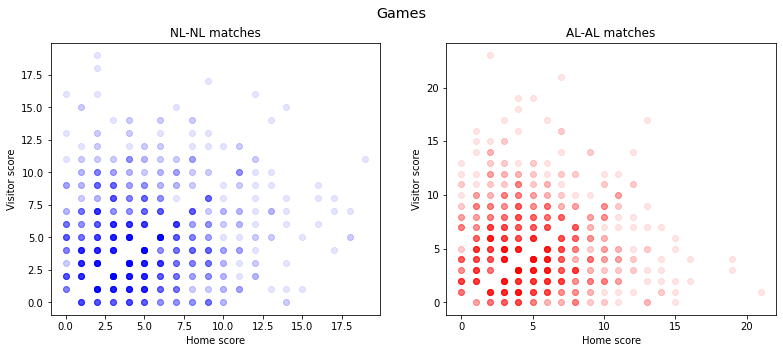

In [338]:
fig = plt.figure()
st = fig.suptitle("Games", fontsize="x-large")

fig.set_size_inches(13, 5)

# NL-NL
ax1 = fig.add_subplot(121)
# include alpha
ax1.scatter(mlb_df_similar[mlb_df_similar.v_league == 'NL'].h_score, mlb_df_similar[mlb_df_similar.v_league == 'NL'].v_score, c='b', alpha=0.1)
ax1.set_title('NL-NL matches')
ax1.set_xlabel("Home score")
ax1.set_ylabel("Visitor score")

# AL-AL
ax2 = fig.add_subplot(122)
# include alpha
ax2.scatter(mlb_df_similar[mlb_df_similar.v_league == 'AL'].h_score, mlb_df_similar[mlb_df_similar.v_league == 'AL'].v_score, c='r', alpha=0.1)
ax2.set_title('AL-AL matches')
ax2.set_xlabel("Home score")
ax2.set_ylabel("Visitor score")

plt.savefig('home_away.pdf')

#### Skellam distribution

In [339]:
mlb_df['score_diff'] = mlb_df.h_score - mlb_df.v_score

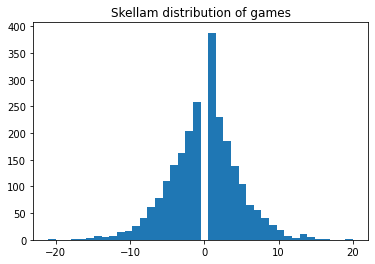

In [353]:
_ = plt.hist(mlb_df.score_diff, 40)
plt.title('Skellam distribution of games');
plt.savefig('score_diff.pdf')